In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm

plt.rcParams['axes.unicode_minus'] = False  # matplotlib 마이너스기호 표시
plt.rc('font', family='NanumGothic')  # matplotlib 한글폰트 표시

In [49]:
test_df = pd.read_csv("C:/Users/jinje/바탕 화면/내일배움캠프/심화 프로젝트/final_test_minmax.csv", index_col=0)
train_df = pd.read_csv("C:/Users/jinje/바탕 화면/내일배움캠프/심화 프로젝트/preprocessed_train.csv", index_col=0)

In [50]:
train_df

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,0.658671,0.0,7,2,0.783116,0.324713,0.329845,1,0.000000,0.000000,0.000000,0.0,0.0,2,0.000000,0.000000,0.658669
1,TRAIN_00001,0.698921,1.0,1,0,0.808957,0.341979,0.420151,10,0.000000,0.731015,0.795184,0.0,0.0,1,0.758338,0.057717,0.555240
2,TRAIN_00002,0.647640,0.0,6,0,0.795568,0.245568,0.311543,1,0.000000,0.782895,0.767395,0.0,0.0,0,0.791120,0.120407,0.647638
3,TRAIN_00003,0.698921,0.0,9,0,0.809352,0.301639,0.329845,1,0.000000,0.723224,0.767885,0.0,0.0,2,0.744785,0.045690,0.698919
4,TRAIN_00004,0.761684,1.0,11,2,0.782957,0.355360,0.393123,8,0.000000,0.703018,0.766117,0.0,0.0,1,0.731233,0.028984,0.618003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,TRAIN_96289,0.698921,0.0,1,0,0.829450,0.253525,0.543598,3,0.000000,0.785646,0.842988,0.0,0.0,2,0.808519,0.135453,0.698919
96290,TRAIN_96290,0.893880,1.0,1,0,0.809352,0.197395,0.467524,10,0.000000,0.756443,0.878515,0.0,0.0,4,0.807424,0.068079,0.750200
96291,TRAIN_96291,0.698921,0.0,0,0,0.789788,0.271945,0.432757,3,0.000000,0.809799,0.797126,0.0,0.0,0,0.817931,0.158464,0.698919
96292,TRAIN_96292,0.721434,0.0,6,0,0.779565,0.315613,0.420151,1,0.319923,0.805396,0.875670,0.0,0.0,3,0.831513,0.183953,0.721432


In [51]:
train_df2 = train_df[["대출등급","대출기간","총상환원금","총상환이자","총상환대출비율","월별대출금액"]]
train_df2

,대출등급,대출기간,총상환원금,총상환이자,총상환대출비율,월별대출금액
0,2,0.0,0.000000,0.000000,0.000000,0.658669
1,1,1.0,0.731015,0.795184,0.057717,0.555240
2,0,0.0,0.782895,0.767395,0.120407,0.647638
3,2,0.0,0.723224,0.767885,0.045690,0.698919
4,1,1.0,0.703018,0.766117,0.028984,0.618003
...,...,...,...,...,...,...
96289,2,0.0,0.785646,0.842988,0.135453,0.698919
96290,4,1.0,0.756443,0.878515,0.068079,0.750200
96291,0,0.0,0.809799,0.797126,0.158464,0.698919
96292,3,0.0,0.805396,0.875670,0.183953,0.721432


## 최종 모델

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

y = train_df2["대출등급"]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = train_df2.copy()
X = X.drop("대출등급", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [53]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score

xgb_minmax = xgb.XGBClassifier(n_estimators=600, learning_rate=0.5, max_depth=20, random_state=42)

# Train the XGBoost classifier
xgb_minmax.fit(X_train, y_train)

y_pred_train = xgb_minmax.predict(X_train)
y_pred_test = xgb_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.972168,0.972219
test,0.921335,0.921155


## 테스트 데이터 예측

In [54]:
test_df

,ID,근로기간,주택소유상태,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TEST_00000,8,0,11,NaN,0.742278,0.0,0.809352,0.328677,0.270962,0.000000,0.734148,0.765093,0.0,0.0,0.751756,0.044284,0.742276
1,TEST_00001,5,2,2,NaN,0.547319,0.0,0.792761,0.306586,0.467524,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.547316
2,TEST_00002,6,2,4,NaN,0.750202,0.0,0.814885,0.243397,0.406959,0.000000,0.820188,0.807127,0.0,0.0,0.828103,0.157913,0.750200
3,TEST_00003,5,0,4,NaN,0.698921,0.0,0.779350,0.291977,0.517403,0.201849,0.764214,0.807105,0.0,0.0,0.783831,0.089284,0.698919
4,TEST_00004,5,2,4,NaN,0.881909,0.0,0.771615,0.374578,0.270962,0.000000,0.799829,0.857301,0.0,0.0,0.822195,0.091306,0.881908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,TEST_64192,3,0,2,NaN,0.905362,0.0,0.786580,0.340809,0.488540,0.319923,0.802390,0.871219,0.0,0.0,0.828161,0.093217,0.905361
64193,TEST_64193,1,0,2,NaN,0.905362,1.0,0.801145,0.278986,0.478226,0.000000,0.784824,0.902692,0.0,0.0,0.831756,0.099081,0.761682
64194,TEST_64194,1,2,2,NaN,0.458251,0.0,0.757239,0.368554,0.543598,0.000000,0.671538,0.726840,0.0,0.0,0.698485,0.047643,0.458248
64195,TEST_64195,1,0,2,NaN,0.636158,0.0,0.779350,0.355565,0.603521,0.201849,0.803768,0.855930,0.0,0.0,0.824484,0.217489,0.636156


In [55]:
test_df2 = test_df[["대출등급","대출기간","총상환원금","총상환이자","총상환대출비율","월별대출금액"]]
test_df2

,대출등급,대출기간,총상환원금,총상환이자,총상환대출비율,월별대출금액
0,NaN,0.0,0.734148,0.765093,0.044284,0.742276
1,NaN,0.0,0.000000,0.000000,0.000000,0.547316
2,NaN,0.0,0.820188,0.807127,0.157913,0.750200
3,NaN,0.0,0.764214,0.807105,0.089284,0.698919
4,NaN,0.0,0.799829,0.857301,0.091306,0.881908
...,...,...,...,...,...,...
64192,NaN,0.0,0.802390,0.871219,0.093217,0.905361
64193,NaN,1.0,0.784824,0.902692,0.099081,0.761682
64194,NaN,0.0,0.671538,0.726840,0.047643,0.458248
64195,NaN,0.0,0.803768,0.855930,0.217489,0.636156


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

y = test_df2["대출등급"]

X = test_df2.copy()
X = X.drop("대출등급", axis = 1)

In [57]:
y_pred = xgb_minmax.predict(X)
y_pred

array([1, 1, 0, ..., 3, 2, 0], dtype=int64)

In [58]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df

,0
0,1
1,1
2,0
3,2
4,2
...,...
64192,3
64193,3
64194,3
64195,2


In [59]:
test_X = test_df2.drop("대출등급", axis = 1)
test_X

,대출기간,총상환원금,총상환이자,총상환대출비율,월별대출금액
0,0.0,0.734148,0.765093,0.044284,0.742276
1,0.0,0.000000,0.000000,0.000000,0.547316
2,0.0,0.820188,0.807127,0.157913,0.750200
3,0.0,0.764214,0.807105,0.089284,0.698919
4,0.0,0.799829,0.857301,0.091306,0.881908
...,...,...,...,...,...
64192,0.0,0.802390,0.871219,0.093217,0.905361
64193,1.0,0.784824,0.902692,0.099081,0.761682
64194,0.0,0.671538,0.726840,0.047643,0.458248
64195,0.0,0.803768,0.855930,0.217489,0.636156


In [60]:
final_test = pd.concat([test_X, y_pred_df], axis = 1)
final_test

,대출기간,총상환원금,총상환이자,총상환대출비율,월별대출금액,0
0,0.0,0.734148,0.765093,0.044284,0.742276,1
1,0.0,0.000000,0.000000,0.000000,0.547316,1
2,0.0,0.820188,0.807127,0.157913,0.750200,0
3,0.0,0.764214,0.807105,0.089284,0.698919,2
4,0.0,0.799829,0.857301,0.091306,0.881908,2
...,...,...,...,...,...,...
64192,0.0,0.802390,0.871219,0.093217,0.905361,3
64193,1.0,0.784824,0.902692,0.099081,0.761682,3
64194,0.0,0.671538,0.726840,0.047643,0.458248,3
64195,0.0,0.803768,0.855930,0.217489,0.636156,2


In [61]:
final_test.rename(columns = {0:"대출등급"}, inplace = True)
final_test

,대출기간,총상환원금,총상환이자,총상환대출비율,월별대출금액,대출등급
0,0.0,0.734148,0.765093,0.044284,0.742276,1
1,0.0,0.000000,0.000000,0.000000,0.547316,1
2,0.0,0.820188,0.807127,0.157913,0.750200,0
3,0.0,0.764214,0.807105,0.089284,0.698919,2
4,0.0,0.799829,0.857301,0.091306,0.881908,2
...,...,...,...,...,...,...
64192,0.0,0.802390,0.871219,0.093217,0.905361,3
64193,1.0,0.784824,0.902692,0.099081,0.761682,3
64194,0.0,0.671538,0.726840,0.047643,0.458248,3
64195,0.0,0.803768,0.855930,0.217489,0.636156,2


In [62]:
final_test.groupby("대출등급").count()

,대출기간,총상환원금,총상환이자,총상환대출비율,월별대출금액
대출등급,,,,,
0,11018,11018,11018,11018,11018
1,19728,19728,19728,19728,19728
2,18540,18540,18540,18540,18540
3,8571,8571,8571,8571,8571
4,4784,4784,4784,4784,4784
5,1324,1324,1324,1324,1324
6,232,232,232,232,232


0 = A  
1 = B  
2 = C  
3 = D  
4 = E  
5 = F  
6 = G

<function matplotlib.pyplot.show(close=None, block=None)>

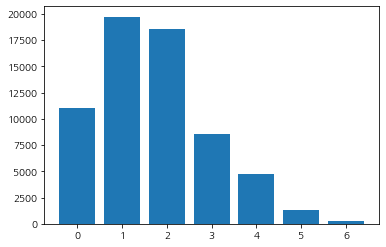

In [63]:
categories = final_test.groupby("대출등급").count().index
values = final_test.groupby("대출등급").count().iloc[:,0]

plt.bar(categories, values)
plt.show

In [64]:
train_df.groupby("대출등급").count()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
대출등급,,,,,,,,,,,,,,,,,
0,16772,16772,16772,16772,16772,16772,16772,16772,16772,16772,16772,16772,16772,16772,16772,16772,16772
1,28817,28817,28817,28817,28817,28817,28817,28817,28817,28817,28817,28817,28817,28817,28817,28817,28817
2,27622,27622,27622,27622,27622,27622,27622,27622,27622,27622,27622,27622,27622,27622,27622,27622,27622
3,13354,13354,13354,13354,13354,13354,13354,13354,13354,13354,13354,13354,13354,13354,13354,13354,13354
4,7354,7354,7354,7354,7354,7354,7354,7354,7354,7354,7354,7354,7354,7354,7354,7354,7354
5,1954,1954,1954,1954,1954,1954,1954,1954,1954,1954,1954,1954,1954,1954,1954,1954,1954
6,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420


In [65]:
train_df.groupby("대출등급").count().index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='대출등급')

In [66]:
train_df.groupby("대출등급").count().iloc[:,0]

대출등급
0    16772
1    28817
2    27622
3    13354
4     7354
5     1954
6      420
Name: ID, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

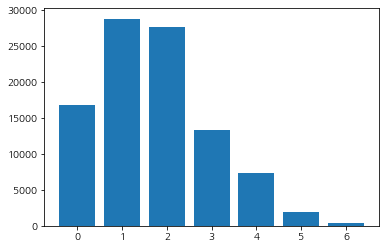

In [67]:
categories = train_df.groupby("대출등급").count().index
values = train_df.groupby("대출등급").count().iloc[:,0]

plt.bar(categories, values)
plt.show

In [70]:
train_eda = train_df[["대출기간", "총상환원금", "총상환이자", "총상환대출비율", "월별대출금액","대출등급"]]
train_eda

,대출기간,총상환원금,총상환이자,총상환대출비율,월별대출금액,대출등급
0,0.0,0.000000,0.000000,0.000000,0.658669,2
1,1.0,0.731015,0.795184,0.057717,0.555240,1
2,0.0,0.782895,0.767395,0.120407,0.647638,0
3,0.0,0.723224,0.767885,0.045690,0.698919,2
4,1.0,0.703018,0.766117,0.028984,0.618003,1
...,...,...,...,...,...,...
96289,0.0,0.785646,0.842988,0.135453,0.698919,2
96290,1.0,0.756443,0.878515,0.068079,0.750200,4
96291,0.0,0.809799,0.797126,0.158464,0.698919,0
96292,0.0,0.805396,0.875670,0.183953,0.721432,3


In [71]:
test_eda = final_test[["대출기간", "총상환원금", "총상환이자", "총상환대출비율", "월별대출금액","대출등급"]]
test_eda

,대출기간,총상환원금,총상환이자,총상환대출비율,월별대출금액,대출등급
0,0.0,0.734148,0.765093,0.044284,0.742276,1
1,0.0,0.000000,0.000000,0.000000,0.547316,1
2,0.0,0.820188,0.807127,0.157913,0.750200,0
3,0.0,0.764214,0.807105,0.089284,0.698919,2
4,0.0,0.799829,0.857301,0.091306,0.881908,2
...,...,...,...,...,...,...
64192,0.0,0.802390,0.871219,0.093217,0.905361,3
64193,1.0,0.784824,0.902692,0.099081,0.761682,3
64194,0.0,0.671538,0.726840,0.047643,0.458248,3
64195,0.0,0.803768,0.855930,0.217489,0.636156,2


In [92]:
# matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['axes.unicode_minus'] = False  # matplotlib 마이너스기호 표시
plt.rc('font', family='NanumGothic')  # matplotlib 한글폰트 표시

<AxesSubplot:xlabel='대출등급', ylabel='총상환원금'>

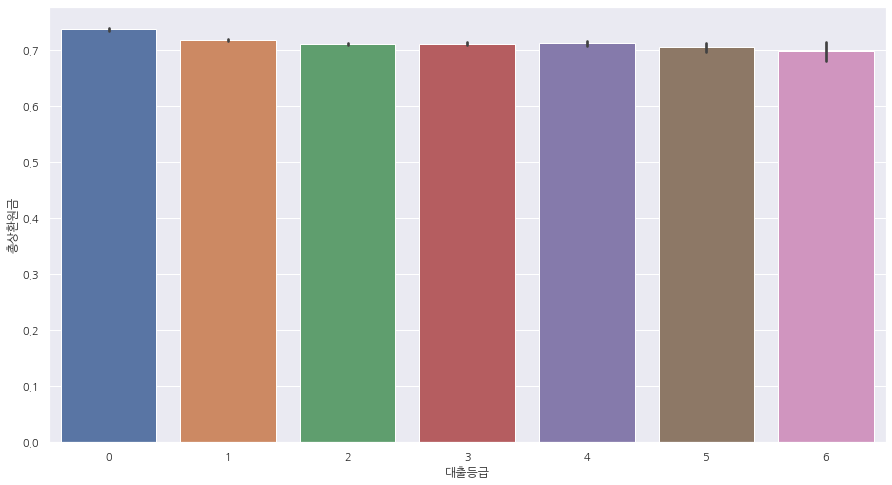

In [89]:
sns.barplot(x = "대출등급", y = "총상환원금", data = train_eda)

<Figure size 1080x576 with 0 Axes>

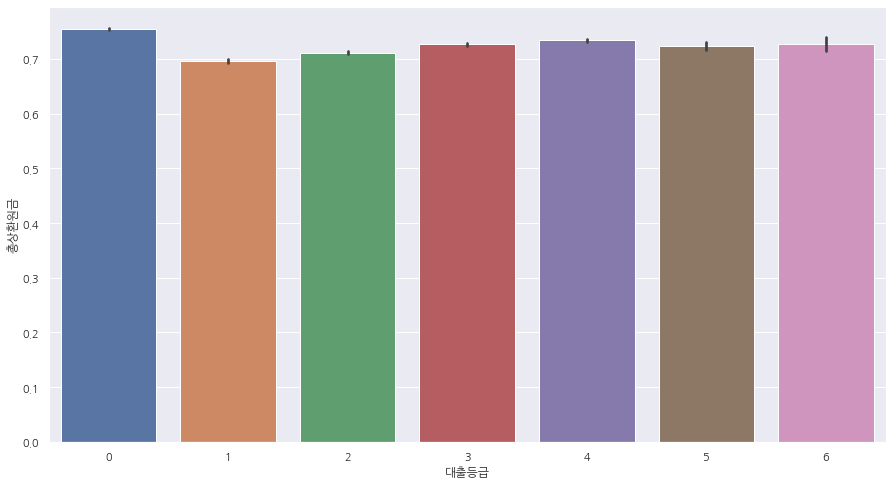

<Figure size 1080x576 with 0 Axes>

In [90]:
sns.barplot(x = "대출등급", y = "총상환원금", data = test_eda)
sns.set(rc={"figure.figsize": (15, 8)})
plt.figure(figsize=(15,8))

<AxesSubplot:xlabel='대출등급', ylabel='총연체금액'>

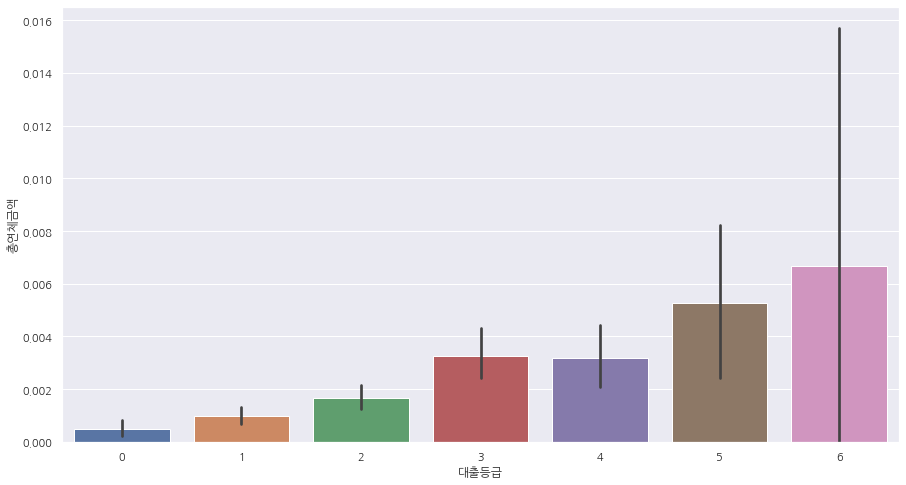

In [93]:
sns.barplot(x = "대출등급", y = "총연체금액", data = train_df)

<AxesSubplot:xlabel='대출등급', ylabel='총상환이자'>

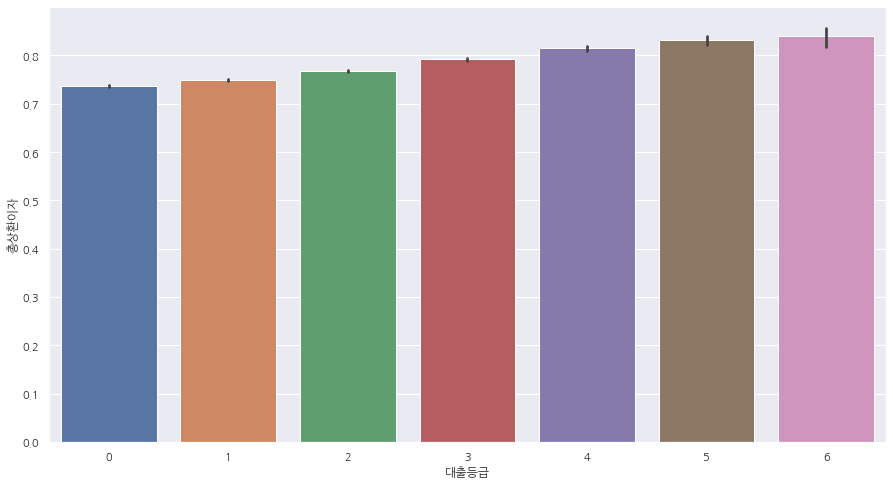

In [94]:
sns.barplot(x = "대출등급", y = "총상환이자", data = train_eda)

<AxesSubplot:xlabel='대출등급', ylabel='월별대출금액'>

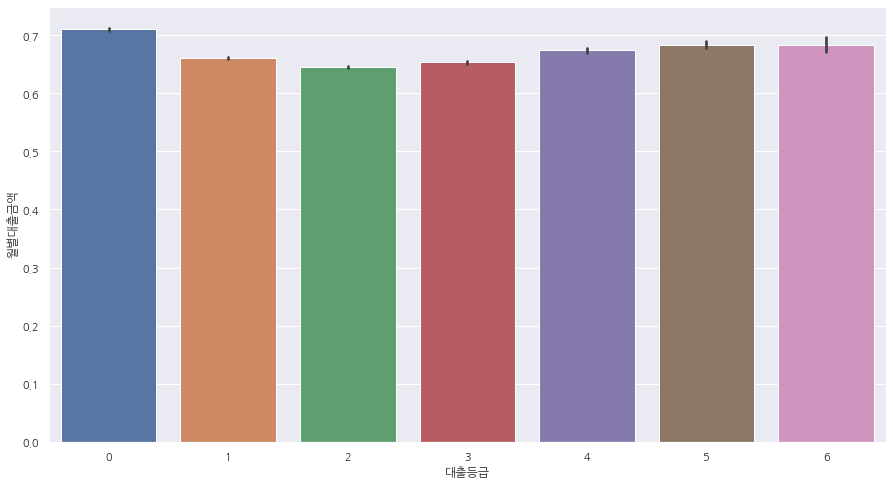

In [95]:
sns.barplot(x = "대출등급", y = "월별대출금액", data = train_eda)

<AxesSubplot:xlabel='대출등급', ylabel='대출기간'>

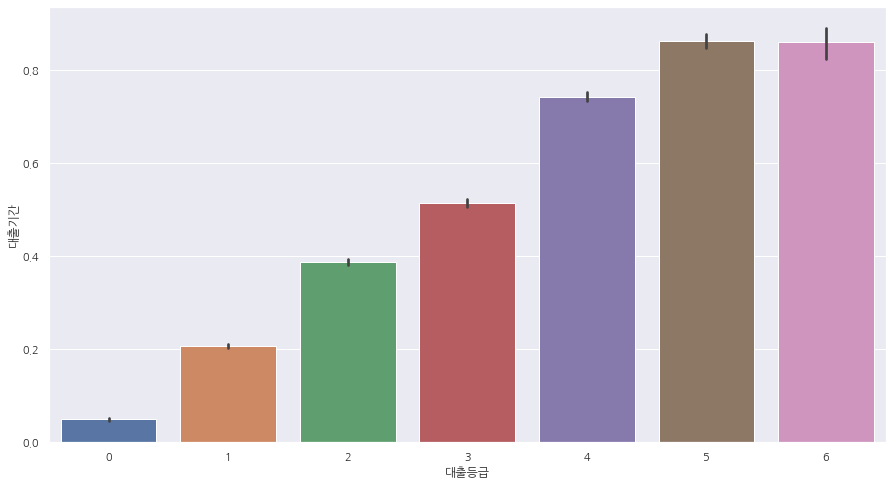

In [96]:
sns.barplot(x = "대출등급", y = "대출기간", data = train_eda)

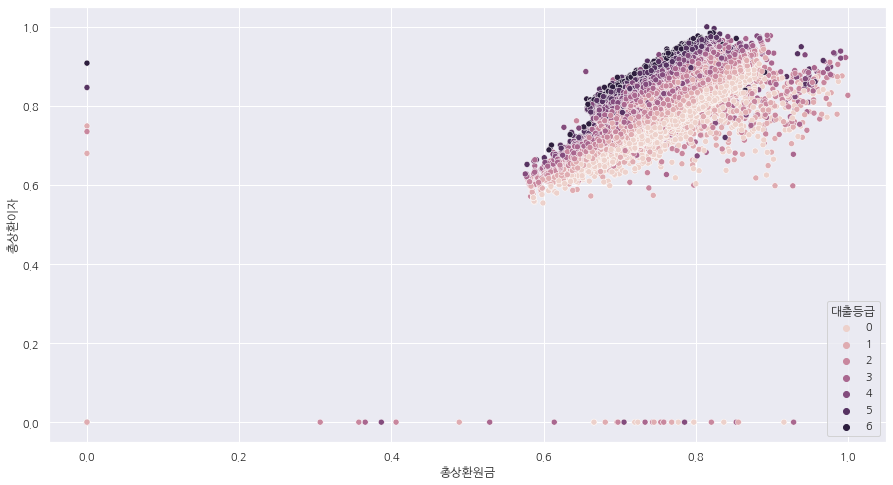

<Figure size 1440x1440 with 0 Axes>

In [97]:
sns.scatterplot(x = "총상환원금", y = "총상환이자", data = train_eda, hue="대출등급");
plt.figure(figsize=(20,20));

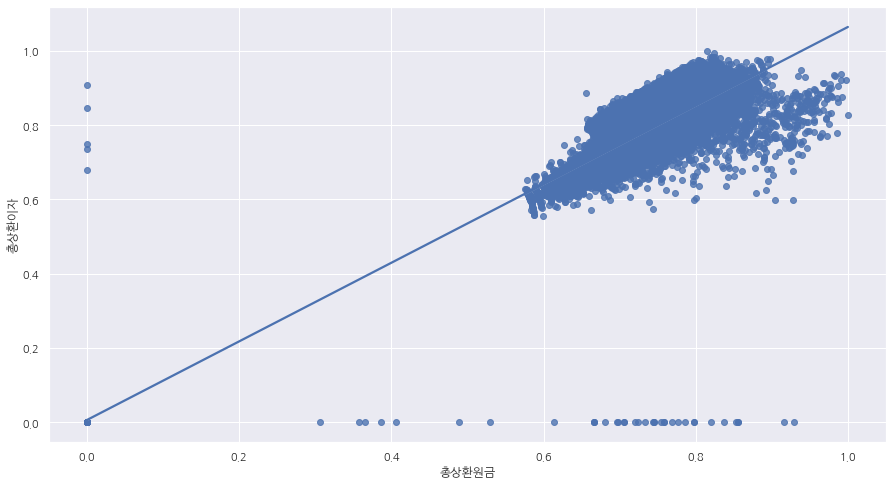

In [99]:
sns.regplot(x = "총상환원금", y = "총상환이자", data = train_eda);

In [100]:
train_df

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,0.658671,0.0,7,2,0.783116,0.324713,0.329845,1,0.000000,0.000000,0.000000,0.0,0.0,2,0.000000,0.000000,0.658669
1,TRAIN_00001,0.698921,1.0,1,0,0.808957,0.341979,0.420151,10,0.000000,0.731015,0.795184,0.0,0.0,1,0.758338,0.057717,0.555240
2,TRAIN_00002,0.647640,0.0,6,0,0.795568,0.245568,0.311543,1,0.000000,0.782895,0.767395,0.0,0.0,0,0.791120,0.120407,0.647638
3,TRAIN_00003,0.698921,0.0,9,0,0.809352,0.301639,0.329845,1,0.000000,0.723224,0.767885,0.0,0.0,2,0.744785,0.045690,0.698919
4,TRAIN_00004,0.761684,1.0,11,2,0.782957,0.355360,0.393123,8,0.000000,0.703018,0.766117,0.0,0.0,1,0.731233,0.028984,0.618003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,TRAIN_96289,0.698921,0.0,1,0,0.829450,0.253525,0.543598,3,0.000000,0.785646,0.842988,0.0,0.0,2,0.808519,0.135453,0.698919
96290,TRAIN_96290,0.893880,1.0,1,0,0.809352,0.197395,0.467524,10,0.000000,0.756443,0.878515,0.0,0.0,4,0.807424,0.068079,0.750200
96291,TRAIN_96291,0.698921,0.0,0,0,0.789788,0.271945,0.432757,3,0.000000,0.809799,0.797126,0.0,0.0,0,0.817931,0.158464,0.698919
96292,TRAIN_96292,0.721434,0.0,6,0,0.779565,0.315613,0.420151,1,0.319923,0.805396,0.875670,0.0,0.0,3,0.831513,0.183953,0.721432
